# Google Play Store Apps

Google m'ha fet arribar dades de les aplicacions de GoogleStore per tal de determinar a quines surt més a compte posar anuncis. Les dades estan recollides en aquest [dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv), el qual conté un total de 10841 aplicacions de Google Store. De cadascuna d'aquestes aplicacions s'especifica el següent:
* **App**: és el nom de l'aplicació. String.
* **Category**: tipus de l'aplicació. String.
* **Rating**: mitjana de les valoracions dels usuaris. Floant entre (0,5).
* **Reviews**: nombre de comentaris de l'aplicació. Int.
* **Size**: tamany de l'aplicació. String.
* **Installs**: nombre d'instal·lacions. String.
* **Type**: si l'aplicació és gratuïta o de pagament. String.
* **Price**: preu de l'aplicació. Float.
* **Content Rating**: persones per qui estan pensada l'aplicació (adolescents, adults, nens, ...). String.
* **Genres**: conjunt de gèneres de l'aplicació. String
* **Last updated**: última vegada que va haver una actualització. String.
* **Current ver**: versió més nova de l'aplicació.
* **Android ver**: versió mínima requerida d'Android per instal·lar l'aplicació. String.

A partir d'aquestes dades els interessa saber quines són les característiques de l'aplicació que fa que sigui més descarregada per tal de poder posar-hi més anuncis. Aquestes aplicacions són les que estan millor calificades?

# Imports de llibreries

In [1]:
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import math
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy.stats
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Descàrrega del dataset

In [3]:
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('./archive/googleplaystore.csv')
data = dataset.values

dimensio_x = data[:, :12]
dimensio_y = data[:, 12]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", dimensio_x.shape)
print("Dimensionalitat de l'atribut Y", dimensio_y.shape)

Dimensionalitat de la BBDD: (10841, 13)
Dimensionalitat de les entrades X (10841, 12)
Dimensionalitat de l'atribut Y (10841,)


# Estudi superficial de les dades del dataset

Imprimeixo les primeres linies del dataset

In [4]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Miro el tipus de dades que té el meu dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Veig que només tinc una única columna que és float, per tant hauré de convertir aquestes dades per poder treballar amb elles.

Comprovo que no hi hagi duplicats

In [6]:
dataset['App'].nunique()

9660

El meu dataset conté un total de 10841 aplicacions, però si eliminem les aplicacions duplicades, tenim un total de 9660.

El meu dataset no està preparat per fer un estudi perquè la gran majoria de les dades són dades 'object'. És per això que s'ha d'adaptar aquest dataset per poder estudiar les dades correctament. 

Comprovem el nombre de categories que té el meu dataset en ***Categories***

In [7]:
dataset['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
dataset['Category'].nunique()

34

Per tant, tinc un total de 34 categories diferents

Comprovo quines dades diferents hi ha a la columna ***Rating*** 

In [9]:
dataset['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [10]:
dataset['Rating'].nunique()

40

Per tant tinc un total de 40 notes diferents.

Comprovo quantes dades tinc en la columna ***Reviews***

In [11]:
dataset['Reviews'].nunique()

6002

I ara comprovo si totes les dades anteriors poden transformar-se a float sense problema

In [12]:
for i, j in enumerate(dataset['Reviews']):
    try:
        j = float(j)
    except ValueError:
        print([i], j)

[10472] 3.0M


Aquí sembla que han col·locat una dada en la posició que no tocava. Marco aquesta casella com un NaN.

In [13]:
dataset['Reviews'][10472] = None

C:\Users\marcb\AppData\Local\Temp\ipykernel_19304\453947802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Reviews'][10472] = None


Ara canvio el tipus de valor per poder treballar amb ells. Els canvio a int perquè es tracten de nombres enters.

Hi ha variables que són strings perquè tenen un caracter de més (ja siguin unitats, com és el cas de la variable ***Size***, com la variable ***Installs*** amb el caracter '+'). En aquest cas per poder treballar amb elles s'ha d'eliminar aquest caracter de més.

Comprovo quantes dades diferents tinc en la columna ***Size***.

In [14]:
dataset['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
dataset['Size'].nunique()

462

La gran majoria de dades les puc transformar després en valors numèrics amb els que puc treballar. Però hi ha dues que no. La primera és que hi ha aplicacions que varien segons el dispositiu, i no podré treballar amb això. Després he detectat també una altra dada que està malament col·locada, ja que em surt 1000+. Així doncs hauré de tractar amb aquestes dades per poder treballar després amb la resta.

Miro com són les dades de la columna ***Installs***

In [16]:
dataset['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

Detecto com altra vegada tinc dades que estan malament col·locades, i, en aquest cas, que tenen la mateixa informació amb un format diferent, el qual provoca que s'agafin com a dades diferents.

La columna ***Type*** es pot tranformar en una variable booleana, la qual permetrà fer un estudi de regressió binaria. Aquesta transformació la farem amb la tècnica *one hot encoding*. En comtpes de fer-ho a partir de la llibreria *SKLearn* he decidit fer-ho manualment perquè, tot i que trigui més estona, m'és més fàcil controlar millor el procès. Comprovo quins són els diferents tipus que té aquesta columna

In [17]:
dataset['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

Altra vegada tenim dades que estan malament col·locades, com és el cas del '0'. En aquest cas podem considerar que 0 fa referència a que és gratuïta.

Comprovem com són les dades de la columna ***Price***

In [18]:
dataset['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

El primer que detecto és que la columna *Price* indica el preu de l'aplicació amb el signe de dòlar ($), la qual cosa m'impedeix transformar aquesta dada a un valor numèric. Haurem d'eliminar-lo.

També he tornat a detectar una dada que està malament col·locada. Trobem un 'Everyone'. Col·loquem aquesta dada com a valor NaN, perquè no podem saber quin valor és el que hauria d'anar en aquesta posició.

In [19]:
dataset['Price'][dataset['Price'] == 'Everyone'] = None

C:\Users\marcb\AppData\Local\Temp\ipykernel_19304\3896408669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Price'][dataset['Price'] == 'Everyone'] = None


***Content Rating*** és una variable que també ens pot ser útil. Miro les diferents etiquetes que té aquesta columna.

In [20]:
dataset['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [21]:
dataset['Content Rating'].nunique()

6

***Genres*** és una variable que conté moltes etiquetes. Intento estudiar com són

In [22]:
dataset['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

Puc veure com n'hi ha moltes que estan enllaçades les unes amb les altres.

In [23]:
dataset['Genres'].nunique()

120

Tinc un total de 115 gèneres diferents

Ara ja puc fer-me una idea de com són les dades amb les quals vull treballar. Les altres columnes no les necessito per a fer el meu estudi.

# Neteja del meu dataset

Ara necessito desfer-me de totes aquelles dades que no em són útils pel meu estudi, dels valors NaN, ... És per això que eliminaré totes aquelles dades que em molestin per a fer els estudis.

Primer eliminem totes aquelles columnes que estan duplicades.

In [24]:
dataset.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

Comprovo quantes dades tenen valors 'NaN', tenint en compte també aquelles caselles que he posat com a nules jo mateix abans.

In [25]:
dataset.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              1
Size                 0
Installs             0
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Elimino totes aquestes dades que tinguin valors 'NaN'

In [26]:
dataset = dataset.dropna()

In [27]:
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Ara ja no tinc valors nulls en el meu dataset.

# Estudi de la correlació de les dades

Ara vull calcular quina és la correlació entre les meves dades, juntament amb la seva distribució 

Primer comprovo la proporció que hi ha d'aplicacions gratuïtes i les que no ho són:

In [28]:
dataset['Type'].value_counts()

Free    8268
Paid     610
Name: Type, dtype: int64

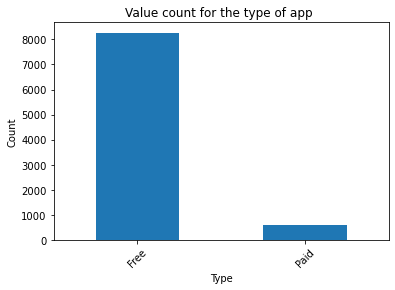

In [29]:
dataset["Type"].value_counts().plot.bar()
plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Value count for the type of app ")
plt.xticks(rotation = 45)

plt.show()

Així que podem veure que hi ha moltes més aplicacions gratuïtes que no pas de pagament.

Imprimeixo un dataset.describe() per mirar com es comporten les dades individualment.

In [30]:
dataset.describe()

,Rating
count,8878.000000
mean,4.187745
std,0.522572
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Només em considera una única columna perquè és l'única que es comporta com una variable float, així que he de canviar el tipus de la resta si vull treballar amb elles. Per fer-ho, però, abans hauré de modificar algunes dades per poder-les transformar.

Primer treuré el signe positiu (+) de la columna *Installs*, i també haurem de treure el caràcter (,).

In [31]:
dataset['Installs'] = dataset['Installs'].str.replace("+", "")
dataset['Installs'] = dataset['Installs'].str.replace(",", "")

Després treuré el signe ($) de la columna *Price*.

In [32]:
dataset['Price']= dataset["Price"].str.replace("$", "")

Anem a modificar la variable *Size*. En aquesta columna hem de treure tant l'M com la K, i modificar aquells paràmetres que variïn segons el dispositiu, que els posaré igual a -1, i fer les operacions convenients perquè estigui tot en les mateixes unitats. Les unitats que vull són les M (megues), per tant:

In [33]:
dataset['Size'] = dataset["Size"].str.replace("M", "")
dataset['Size'] = dataset['Size'].str.replace("Varies with device","-1")

In [34]:
dataset['Size'] = dataset['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024),1) )if x[-1]=='k' else x)

Ara ja puc transformar-les a dades numèriques.

In [35]:
dataset["Reviews"] = dataset['Reviews'].astype(float)
dataset["Installs"] = dataset['Installs'].astype(float)
dataset["Price"] = dataset['Price'].astype(float)
dataset['Size'] = dataset['Size'].astype(float)

Per calcular com de relacionades estan aquestes dades, faig un heatmap.

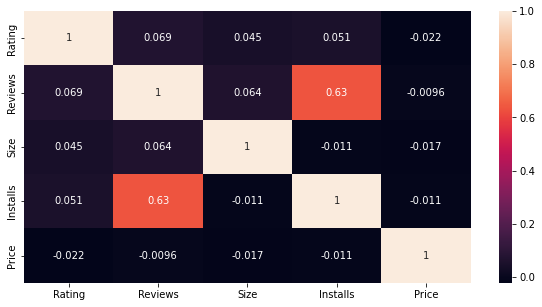

In [36]:
plt.figure(figsize=(10,5))

corr= dataset.corr()
sns.heatmap(corr, annot=True)

plt.show()

D'aquí podem veure que les úniques variables que estan relacionades són el nombre d'instal·lacions que ha tingut l'aplicació i el nombre de comentaris que ha tingut.

# Quines són les aplicacions millor calificades?

Per poder trobar quines són les categories que estan millor calificades, i poder donar resposta a una de les nostres preguntes inicials, el primer que faig és mirar les diferents notes que tinc en el meu dataset.

In [37]:
dataset['Rating'].value_counts()

4.4    1030
4.3    1016
4.5     975
4.2     885
4.6     767
4.1     655
4.0     538
4.7     482
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

Fem un boxplot d'aquestes dades per mirar com estan distribuïdes

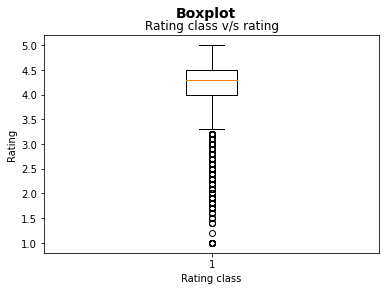

In [38]:
fig = plt.figure()

fig.suptitle('Boxplot', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(dataset['Rating'])
ax.set_title('Rating class v/s rating')
ax.set_xlabel('Rating class')
ax.set_ylabel('Rating')

plt.show()

Veiem que hi ha moltes dades que surten del recuadre. Aquestes dades que estan fora podrien considerar-se outliers en les nostres dades. Tot i així, les deixem i mirem com estan distribuïdes en un gràfic.

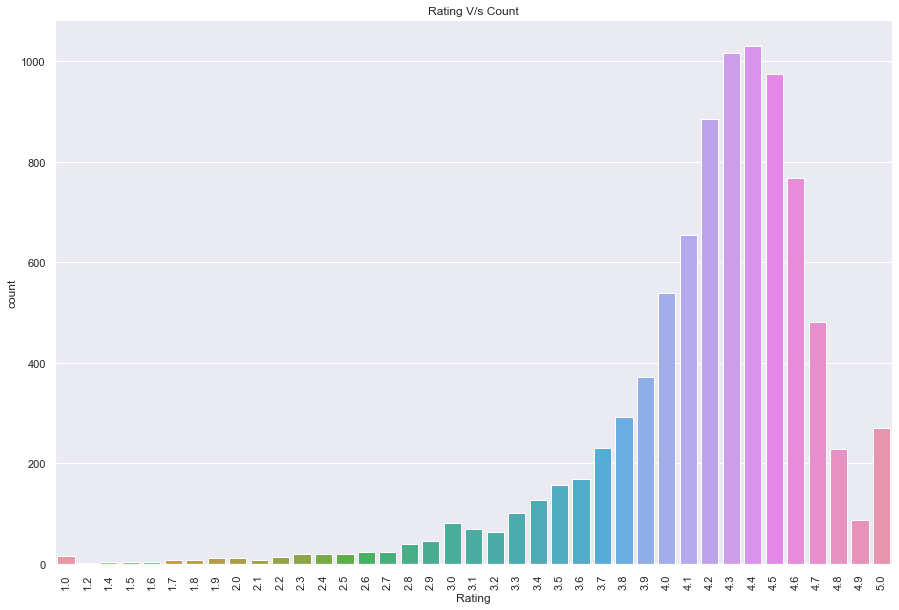

In [39]:

plt.figure(figsize=(15,10))

sns.set_theme(style="darkgrid")

plt.xticks(rotation=90)
plt.title("Rating V/s Count")

ax = sns.countplot(x="Rating", data=dataset)

Veiem que on hi ha un volum més alt de dades és entre el 4 i el 4.8, aproximadament. Mirem a vuere quines són les 5 millors notes del nostre dataset.

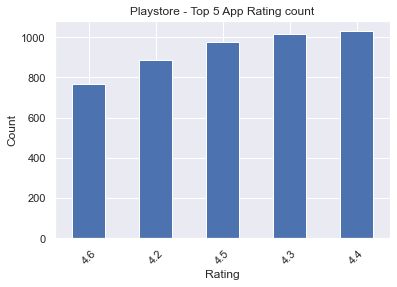

In [40]:
dataset["Rating"].value_counts().head(5).sort_values(ascending=True).plot.bar()
plt.ylabel("Count")
plt.xlabel("Rating")
plt.title("Playstore - Top 5 App Rating count")
plt.xticks(rotation=45)
plt.show()

A partir del volum de les dades, les divideixo en tres subconjunts:
* De 4 a 5
* De 3 a 4
* Més petit que 3
Fent aquesta aproximació em serà més fàcil mirar quina és la tendència de les notes.

In [41]:
app_rating1 = dataset[dataset['Rating'] >= 4]
app_rating2 = dataset[(dataset['Rating'] < 4) & (dataset['Rating'] > 3 )]
app_rating3 = dataset[dataset['Rating'] <= 3]

Imprimeixo aquests tres subconjunts per mirar com han quedat distribuïdes ara

In [42]:
app_rating1.shape,app_rating2.shape,app_rating3.shape

((6934, 13), (1582, 13), (362, 13))

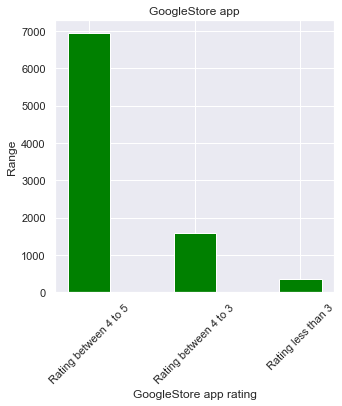

In [43]:
data = {'Rating between 4 to 5':6934, 'Rating between 4 to 3':1582, 'Rating less than 3':362,
        }
x = list(data.keys())
y = list(data.values())

fig = plt.figure(figsize = (5, 5))

plt.bar(x, y, color ='green',
        width =0.4)

plt.xlabel("GoogleStore app rating")
plt.ylabel("Range")
plt.title("GoogleStore app")
plt.xticks(rotation=45)
plt.show()

Per tant puc veure que la gran majoria de les aplicacions estan molt ben valorades. És per això que decideixo buscar quina és la categoria que té més notes màximes (5.0). Per poder fer això, primer he de seleccionar-les i comptar quants 5's hi ha per cada categoria

In [44]:
dataset_rating = dataset[dataset['Rating'] == 5.0]
dataset_rating['Category'].value_counts(ascending=False)

FAMILY                 67
LIFESTYLE              29
MEDICAL                25
BUSINESS               18
TOOLS                  17
GAME                   12
HEALTH_AND_FITNESS     12
PERSONALIZATION        10
SOCIAL                  8
PRODUCTIVITY            8
FINANCE                 8
NEWS_AND_MAGAZINES      7
BOOKS_AND_REFERENCE     6
DATING                  6
SHOPPING                6
EVENTS                  6
PHOTOGRAPHY             6
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
COMICS                  2
FOOD_AND_DRINK          2
LIBRARIES_AND_DEMO      2
PARENTING               1
ART_AND_DESIGN          1
Name: Category, dtype: int64

Per tant les 5 millors categories segons les notes són:

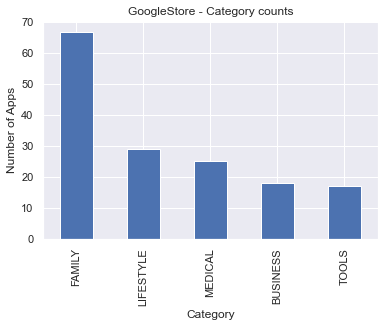

In [45]:
dataset_rating.Category.value_counts(ascending=False).nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("GoogleStore - Category counts")
plt.show()

Per entendre millor aquestes dades, mirem la quantitat que hi ha de cada categoria gràficament

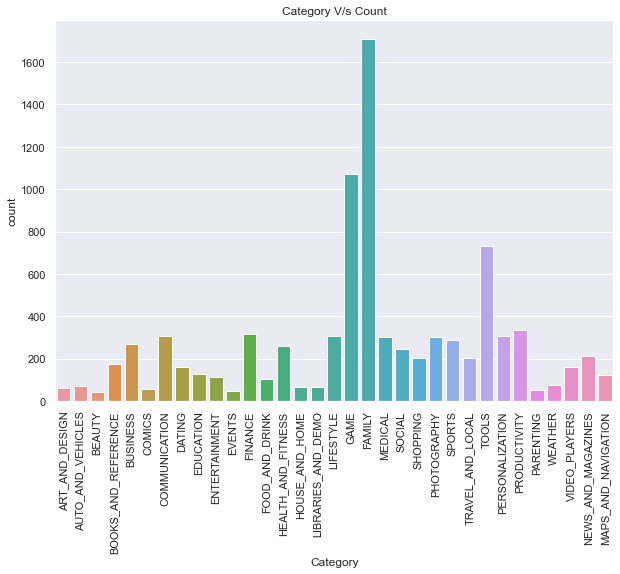

In [46]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=90)
plt.title("Category V/s Count")
ax = sns.countplot(x="Category", data=dataset)

Interpretant aquestes dues últimes gràfiques dedueixo que és normal que 'Family' tingui més notes màximes perquè és la categoria d'aplicacions més representada en el meu dataset. Buscant la categoria 'Lifetime' veig que s'acosta més a la mitjana de la resta de categories, per tant té molt mèrit que sigui la segona amb més notes màximes, de la mateixa manera amb 'Medical' i 'Bussiness'. 'Tools' té una situació similar a 'Lifetime'.

# Quines són les aplicacions més descarregades?

Un cop he descobert quines són les categories més comunes, m'interessa saber quines són les aplicacions més descarregades del meu dataset. Primer el que faig és imprimir les dades per categories.

In [47]:
dataset.groupby("Category").Installs.agg(["min", "mean", "median", "max"])

,min,mean,median,max
Category,,,,
ART_AND_DESIGN,100.0,2.036526e+06,100000.0,5.000000e+07
AUTO_AND_VEHICLES,100.0,7.278055e+05,100000.0,1.000000e+07
BEAUTY,100.0,6.408619e+05,100000.0,1.000000e+07
BOOKS_AND_REFERENCE,5.0,1.082651e+07,100000.0,1.000000e+09
BUSINESS,5.0,3.198215e+06,10000.0,1.000000e+08
COMICS,100.0,9.661397e+05,100000.0,1.000000e+07
COMMUNICATION,10.0,7.867180e+07,1000000.0,1.000000e+09
DATING,10.0,1.298883e+06,100000.0,1.000000e+07
EDUCATION,1000.0,4.138388e+06,1000000.0,1.000000e+08


Ara ordeno aquest conjunt per major nombre d'instal·lacions

In [48]:
top_installed_apps = dataset.sort_values(by="Installs", ascending= False).head()

Agafo les 10 aplicacions més descarregades

In [49]:
top_installed_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
386,Hangouts,COMMUNICATION,4.0,3419433.0,-1.0,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13.0,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
4098,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613.0,-1.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,-1.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,-1.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


No podem mirar quina és la més descarregada perquè hi ha moltes que comparteixen la posició

In [50]:
len(dataset[dataset["Installs"]>= 1000000000])

49

Hi ha 49 aplicacions que tenen més d'un bilió de descàrregues

Ara miro les aplicacions que tenen més descàrregues i que tenen més bona valoració

In [51]:
top_10_installed_and_rated_apps = dataset.sort_values(by=["Installs", "Rating"], ascending=False)
top_10_installed_and_rated_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313.0,-1.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


Ara miro les aplicacions qeu tenen més descàrregues i que tenen més comentaris

In [52]:
top_10_installed_and_reviewed_apps = dataset.sort_values(by=["Installs", "Reviews"], ascending=False)
top_10_installed_and_reviewed_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,-1.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,-1.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,-1.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,-1.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,-1.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


# Quina franja d'edat és la que té més aplicacions?

Una de les informacions que ens dona el dataset és la columna ***Content Rating***, la qual especifica el rang d'edat per la que l'aplicació està pensada. He d'estudiar aquesta columna independentment de les altres perquè els seus valors no poden transformar-se numèricament. Començo mirant el nombre de diferents categories que hi ha i les seves etiquetes.

In [53]:
dataset["Content Rating"].value_counts(ascending=False)

Everyone           7083
Teen               1021
Mature 17+          411
Everyone 10+        359
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Imprimeixo un gràfic per mirar visualment com estan repartides aquestes categories

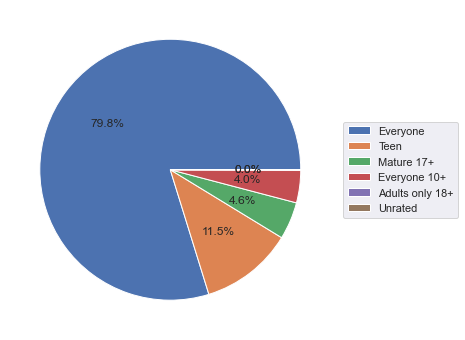

In [54]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

number_of_apps = dataset["Content Rating"].value_counts()

labels = number_of_apps.index

sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))

In [55]:
top_10_installed_and_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1.000000e+09,Free,0.00,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193.0,76.0,1.000000e+09,Free,0.00,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094.0,76.0,1.000000e+09,Free,0.00,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352.0,76.0,1.000000e+09,Free,0.00,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313.0,-1.0,1.000000e+09,Free,0.00,Teen,Social,"July 31, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9218,EB Cash Collections,BUSINESS,5.0,1.0,4.3,5.000000e+00,Free,0.00,Everyone,Business,"July 31, 2018",1.10,4.4 and up
10562,FK Atlantas,SPORTS,1.5,2.0,26.0,5.000000e+00,Free,0.00,Everyone,Sports,"February 21, 2018",1.0,4.1 and up
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25.0,1.000000e+00,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2.0,20.0,1.000000e+00,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up


In [56]:
dataset.sort_values(by="Rating", ascending= False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9536,Shabad Gurubani Punjabi mp3 free - Ek Onkar Sa...,FAMILY,5.0,5.0,64.0,100.0,Free,0.00,Everyone,Entertainment,"January 19, 2018",1.1,4.4 and up
9518,Asha Ek Hope - ALS/ MND,MEDICAL,5.0,2.0,11.0,100.0,Free,0.00,Everyone,Medical,"May 23, 2018",1.1.0,4.1 and up
10166,FA Player Essentials,SPORTS,5.0,7.0,68.0,100.0,Free,0.00,Everyone,Sports,"July 23, 2018",1.6.0,4.0.3 and up
7418,CJ Gospel Hour,SOCIAL,5.0,7.0,18.0,100.0,Free,0.00,Everyone,Social,"July 25, 2018",1.0,4.4 and up
7405,Nur təfsiri 1-ci cild,LIBRARIES_AND_DEMO,5.0,15.0,1.4,1000.0,Free,0.00,Everyone,Libraries & Demo,"April 27, 2017",1.0,1.6 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6.1,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
5268,AJ Rafael Music Lessons,FAMILY,5.0,1.0,8.2,10.0,Free,0.00,Everyone,Entertainment,"November 29, 2017",1.2.1,4.1 and up
6604,BP Log lite,LIFESTYLE,5.0,3.0,1.5,100.0,Free,0.00,Everyone,Lifestyle,"November 15, 2014",1.1,2.2 and up
6605,MI-BP,HEALTH_AND_FITNESS,5.0,1.0,12.0,50.0,Free,0.00,Everyone,Health & Fitness,"April 9, 2018",1.0.8.506,5.0 and up
5263,AJ Blue Icon Pack,PERSONALIZATION,5.0,4.0,31.0,50.0,Paid,0.99,Everyone,Personalization,"April 27, 2018",1.1,4.1 and up


# Quines són les categories amb més aplicacions de pagament?

M'he preguntat també quines són les categories que posen els preus més alts, o que tendeixen més a posar aplicacions de pagament. He començat imprimint els preus més alts del meu dataset.

In [57]:
dataset["Price"].value_counts().sort_values(ascending=False).head()

0.00    8268
2.99     110
0.99     104
4.99      68
1.99      59
Name: Price, dtype: int64

També torno a imprimir la proporció d'aplicacions gratuïtes i de pagament que té el meu dataset.

In [58]:
dataset.Type.value_counts()

Free    8268
Paid     610
Name: Type, dtype: int64

Imprimeixo el conjunt de les categories amb el nombre d'aplicions totals i les de pagament que tenen

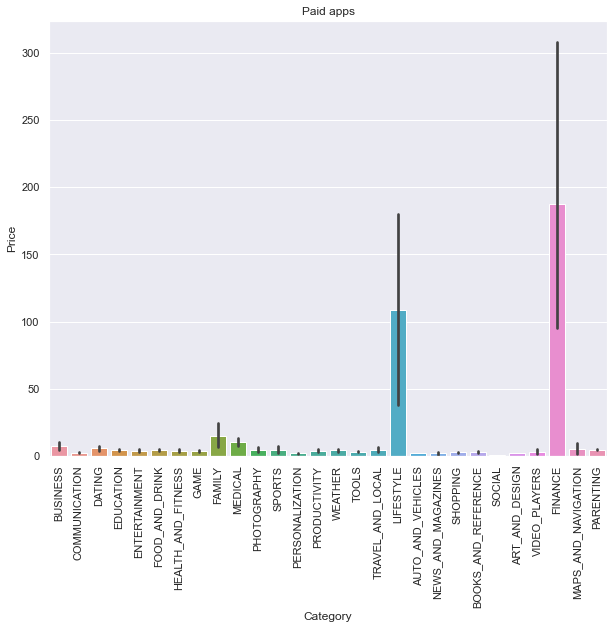

In [59]:
paid_apps = dataset[dataset["Price"] != 0.0]

paid_family_apps = paid_apps[paid_apps["Category"]=="FAMILY"]
paid_family_apps.count()

paid_communications_apps = paid_apps[paid_apps["Category"]=="COMMUNICATION"]
paid_communications_apps.count()

plt.figure(figsize=(10,8))
sns.barplot(x="Category", y="Price", data=paid_apps,
            label="Total Paid Apps in Each Category")
plt.title("Paid apps")
plt.xticks(rotation=90)
plt.show()

# Què és el que hem de fer per a obtenir una bona qualificació en GoogleStore?

Per aquest apartat m'agradaria predir què és el que hem de fer per poder obtenir obtenir una bona qualificació en GoogleStore fent diferents testos de regressió lineal.

Primer repassaré com està distribuïda la variable ***Rating***

Text(0.5, 1.0, 'Distribution of Rating')

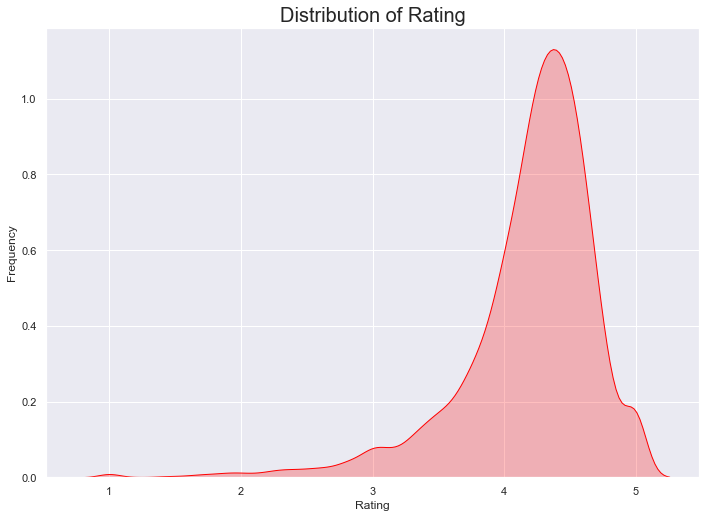

In [60]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(dataset['Rating'], color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Un cop fet això, compararé la columna ***Rating*** amb altres variables de la columna per determinar si alguna d'elles poden ajudar-me a tenir una millor nota.

La primera variable amb la que la compararé serà ***Categories***, i començaré fent un boxplot de les dues columnes.

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

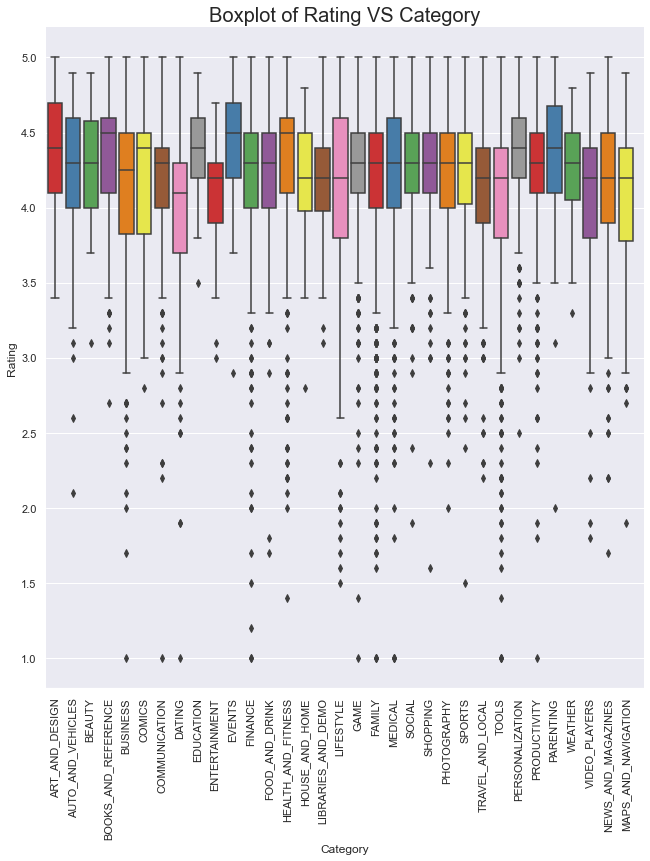

In [61]:
g = sns.catplot(x="Category",y="Rating",data=dataset, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Amb aquest boxplot puc veure que les notes de les diferents categories són molt similars, per tant buscaré una altra variable amb la que comparar

La comparo amb la variable ***Reviews***, i per poder comparar les dades faré un *jointplot*.

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

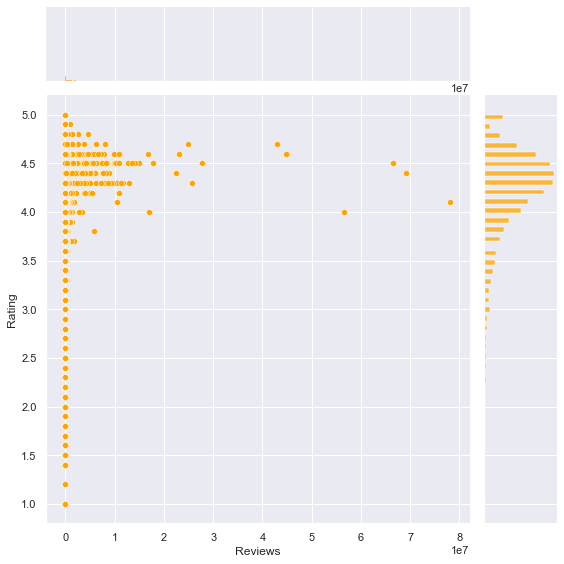

In [62]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating", color = 'orange', data = dataset, size = 8)

Mirant el recuadre del mig, puc veure que les aplicacions que tenen més reviews són aquelles que acostumen a tenir millors valoracions, per tant intento representar aquesta tendència fent una regressió lineal

Text(0.5, 1.0, 'Rating VS Reveiws')

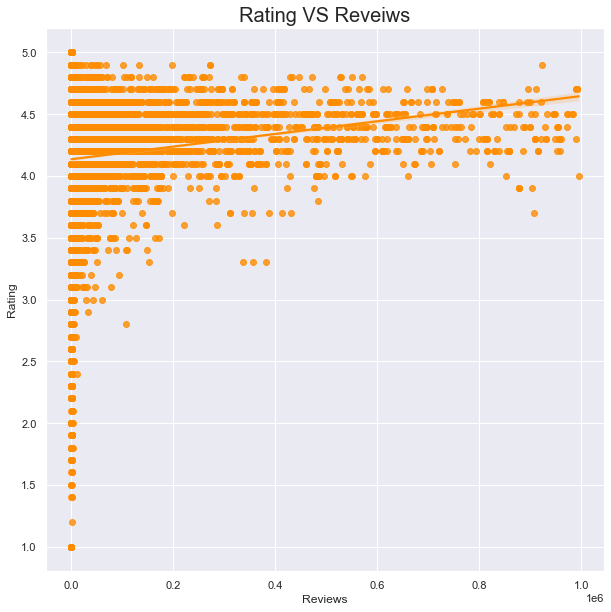

In [63]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=dataset[dataset['Reviews']<1000000]); #poso aquesta condició per encuadrar millor les dades en el gràfic
plt.title('Rating VS Reveiws',size = 20)

A partir d'aquesta regressió que he fet, puc afirmar que, efectivament, les aplicacions que tenen un major nombre de reviews són aquelles que tenen més bones valoracions

Ara vull comparar les dades amb la variable ***Size***. Per fer-ho, tal com he fet abans, vaig un *jointplot* de les dades.

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

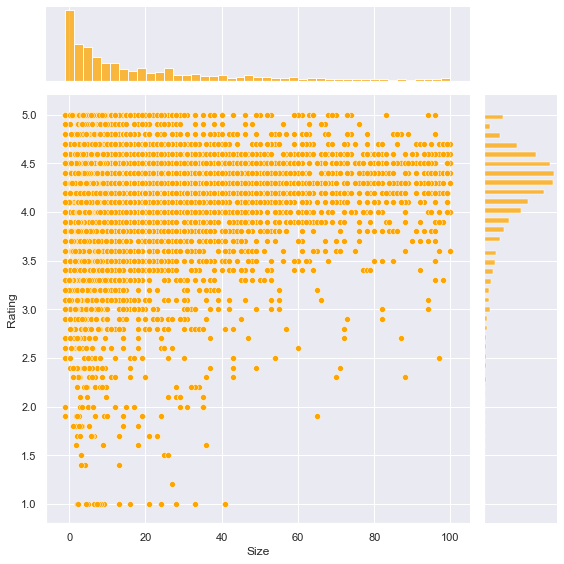

In [64]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orange', data=dataset, size = 8);

Sembla ser que sí que podria haver-hi una relació entre el tamany de l'aplicació i les seves valoracions. No és tan pronunciat com amb la variable *Reviews*, però sí que sembla que hi ha una tendència.

Text(0.5, 1.0, 'Rating VS Size')

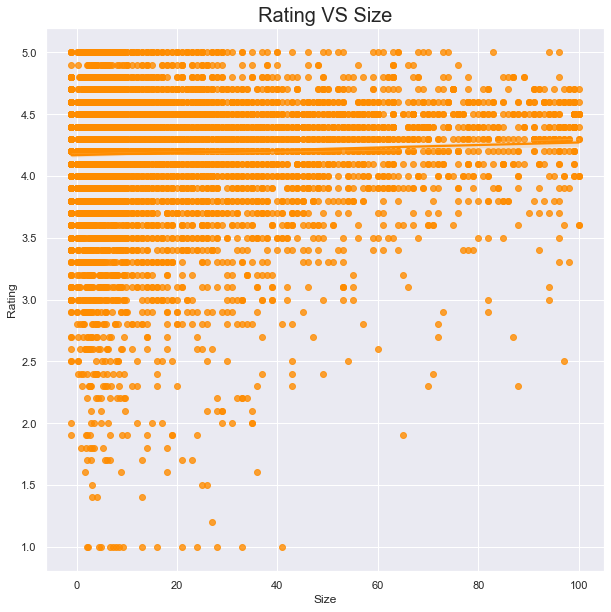

In [65]:
plt.figure(figsize = (10,10))
sns.regplot(x="Size", y="Rating", color = 'darkorange',data=dataset)
plt.title('Rating VS Size',size = 20)

Sembla ser que com més gran sigui l'aplicació més bona valoració té. Això ho puc interpretar com que una aplicació que té un tamany molt gran, és aquella que conté moltes funcions diferents i que és molt útil per la funció que estigui programada. Així doncs, si l'aplicació conté moltes funcions, sempre que aquetes estiguin ben programades, és normal que tingui bones valoracions.

Comparo ara amb la columna ***Installs***.

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

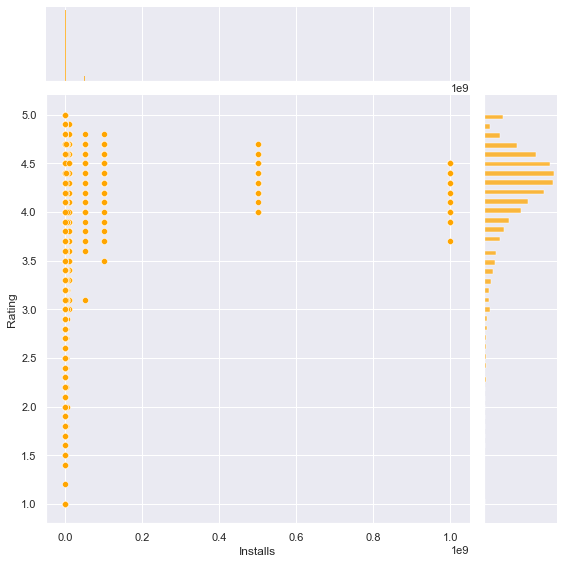

In [66]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Installs", y="Rating",color = 'orange', data=dataset, size = 8)

La distribució d'aquestes dades és extranya. Mirant el recuadre de la dreta sembla ser que, tot i així, sí que sembla que hi ha una relació entre aquestes dues variables. 

Text(0.5, 1.0, 'Rating VS Installs')

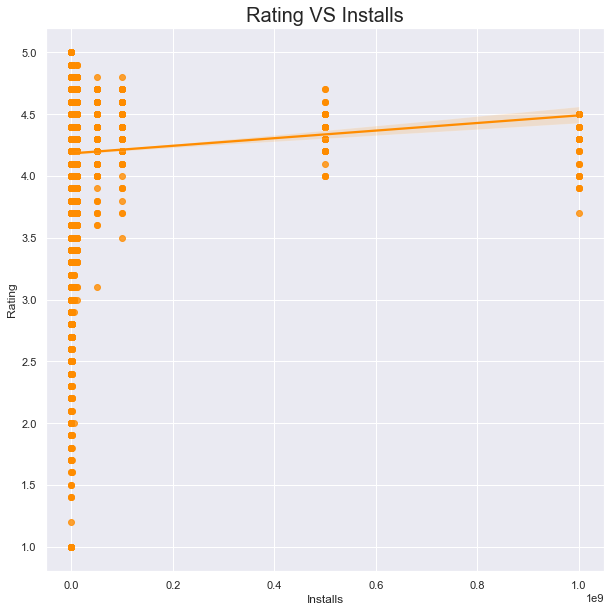

In [67]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'darkorange',data=dataset)
plt.title('Rating VS Installs',size = 20)

La línia de tendència continua sent extranya, però la relació entre aquestes dues variables pot justificar-se de dues maneres diferents.

No seria extrany pensar que una aplicació que hagi estat descarregada moltes vegades tingui més possibilitats de tenir una valoració més alta que no pas una aplicació que hagi estat instal·lada poques vegades. 

Es pot justificar també de la següent manera. Una aplicació molt ben valorada és més recomenada per la mateixa plataforma que no pas una que està valorada negativament. Per tant, a l'estar més accessible als usuaris, porta a un nombre d'instal·lacions més alta.

Anem a comparar-ho amb la variable ***Type***, la qual indica si l'aplicació és gratuïta o no. Però, si recordem la distribució d'aquestes dades, la gran majoria eren gratuïtes, per tant no hi ha estudi de regressió possible que tingui sentit.

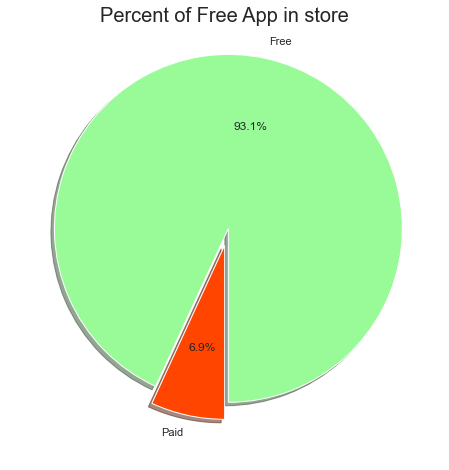

In [68]:
labels =dataset['Type'].value_counts(sort = True).index
sizes = dataset['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()

Un 93.1% de les etiquetes d'aquesta columna és 'Free', per tant no és possible fer cap prediccions amb aquestes dades.

Tot i que no es pugui comparar amb la variable *Type*, miro a veure si amb la variable ***Price*** puc arribar a alguna conclusió.

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

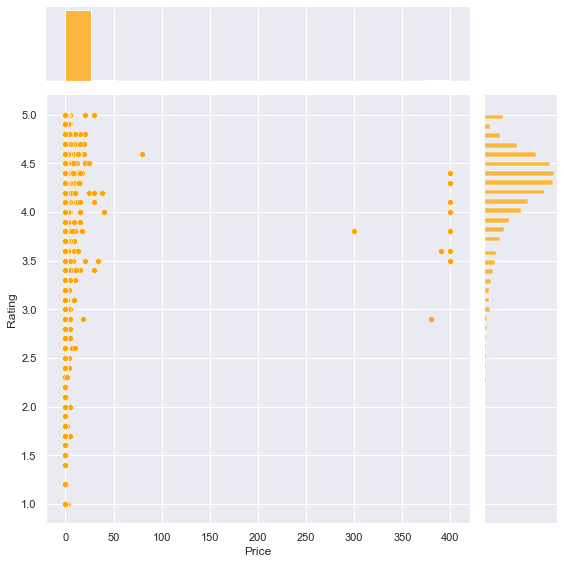

In [69]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Price", y="Rating",color = 'orange', data=dataset, size = 8)

Podem veure com les aplicacions que costen al voltant de 400$ tenen valoracions entre 3.5 i 4.5, mentre que hi ha aplicacions gratuïtes que tenen valoracions de la màxima nota. Tot i que no hi hagi cap tendència clara, intento fer una regressió per estudiar quina és la tendència.

Text(0.5, 1.0, 'Rating VS Price')

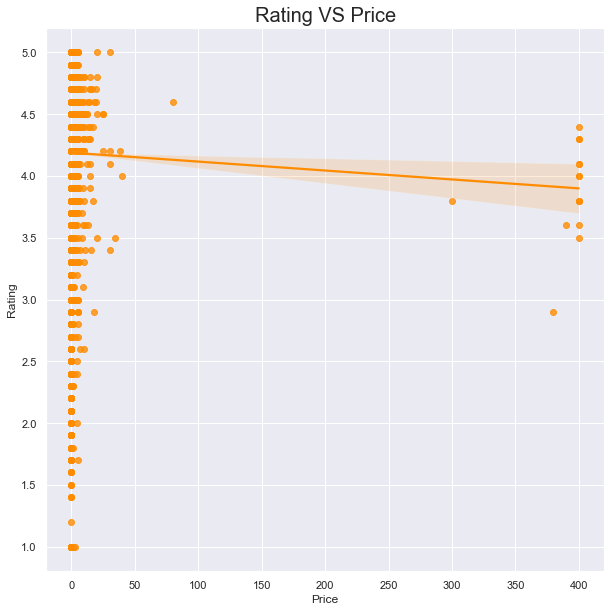

In [70]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=dataset)
plt.title('Rating VS Price',size = 20)

Tal com he dit abans, no hi ha cap tendència clara amb la distribució de les dades amb les que treballo.

Les aplicacions que tenen un preu tan elevat han de ser perquè tenen una funció específica molt exigent. Si és així, és comprensible que les valoracions no arribin a la nota màxima, perquè és molt complicat cumplir amb tots els requisits d'una aplicació tan important. Això també provoca que les persones que la facin servir siguin un grup molt reduït, comparat amb el nombre de persones que es descarreguen qualsevol de les aplicacions gratuïtes. 

Així doncs podríem arribar a justifiar la tendència de la linia de regressió dient que a major preu, les espectatives del comprador són molt altes, per tant més fàcil decepcionar-los si l'aplicació no és prou bona

Com que no ha quedat clar, intento treballar amb les dades de manera diferent. Divideixo totes les aplicacions per categories segons el seu preu

In [71]:
dataset.loc[ dataset['Price'] == 0, 'PriceBand'] = '0 Free'
dataset.loc[(dataset['Price'] > 0) & (dataset['Price'] <= 0.99), 'PriceBand'] = '1 cheap'
dataset.loc[(dataset['Price'] > 0.99) & (dataset['Price'] <= 2.99), 'PriceBand']   = '2 not cheap'
dataset.loc[(dataset['Price'] > 2.99) & (dataset['Price'] <= 4.99), 'PriceBand']   = '3 normal'
dataset.loc[(dataset['Price'] > 4.99) & (dataset['Price'] <= 14.99), 'PriceBand']   = '4 expensive'
dataset.loc[(dataset['Price'] > 14.99) & (dataset['Price'] <= 29.99), 'PriceBand']   = '5 pretty expensive'
dataset.loc[(dataset['Price'] > 29.99), 'PriceBand']  = '6 too expensive'

Ara faig un bloxplot per mirar com es distribueixen aquestes dades.

Text(0.5, 1.0, 'Boxen plot Rating VS PriceBand')

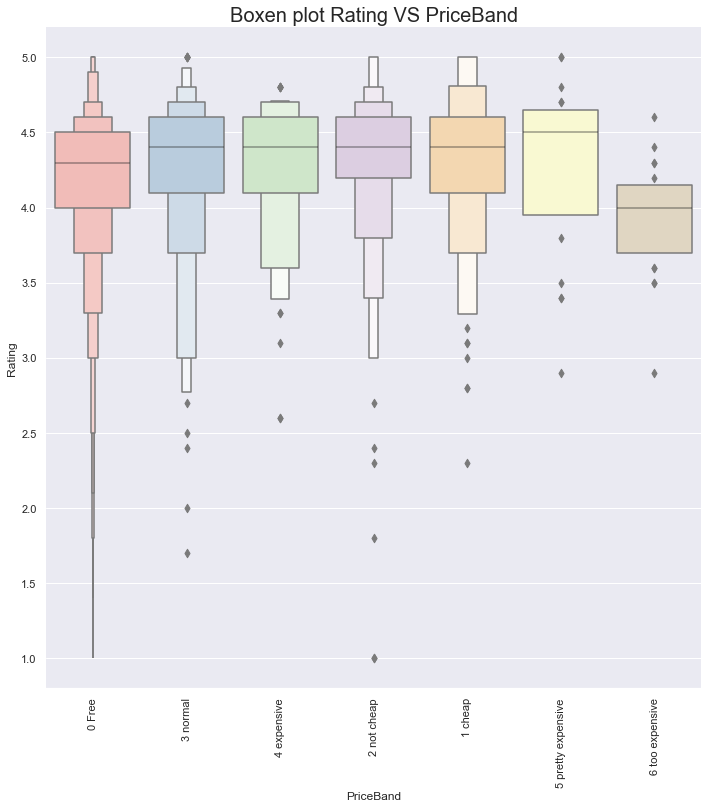

In [72]:
g = sns.catplot(x="PriceBand",y="Rating",data=dataset, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

Amb aquest boxplot puc veure com el preu no té cap mena de relació amb les valoracions que tenen les aplicacions. El que sí que es pot veure, però, és que un preu molt elevat pot provocar que les valoracions baixin, fet que es pot justificar de la mateixa manera d'abans: un preu molt elevat porta a espectatives molt altes també.

Ara estudiaré la relació que la variable *Rating* té amb la variable ***Content Rating***. Per fer-ho, com que es tracta d'etiquetes, faré un boxplot i compararé les tendències.

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

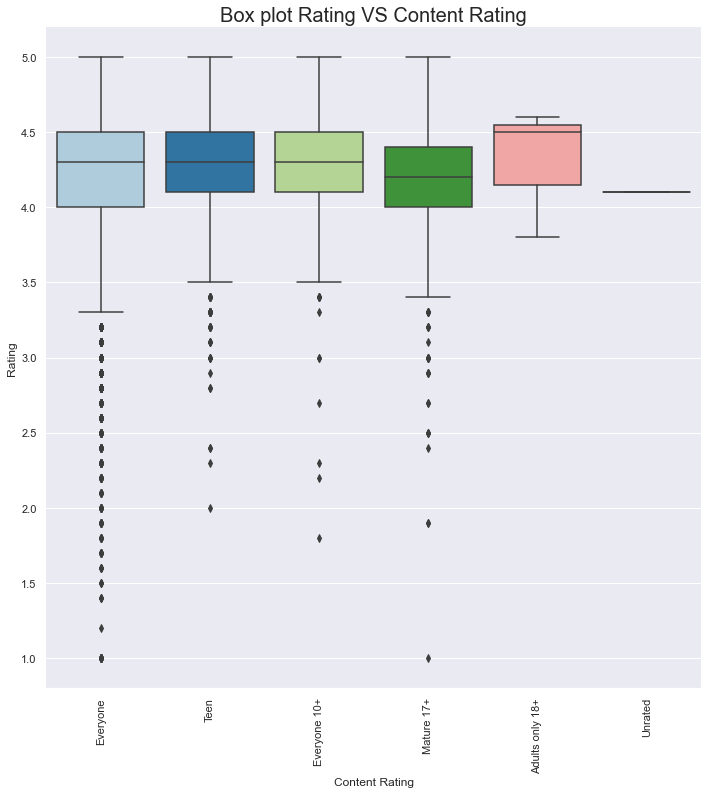

In [73]:
g = sns.catplot(x="Content Rating",y="Rating",data=dataset, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

La categoria 'Unrated' no ens és útil perquè només hi ha una. Però de les altres podem dir que no hi ha cap tendència. Totes distribucions segueixen una tendència similar, per tant puc afimar que aquesta variable no provoca valoracions més bones.

Ara faré servir la variable ***Genres*** per intentar predir els meus resultats. Com que encara no havia fer servir aquesta variable, he d'adaptar encara les dades per poder treballar amb elles.

Estudio quines són les 10 més comunes

In [74]:
dataset['Genres'].value_counts().head(10)

Tools              731
Entertainment      497
Education          445
Action             349
Productivity       334
Finance            317
Personalization    308
Communication      307
Lifestyle          304
Photography        304
Name: Genres, dtype: int64

I ara les menys comunes

In [75]:
dataset['Genres'].value_counts().tail(10)

Parenting;Brain Games                1
Card;Brain Games                     1
Entertainment;Education              1
Travel & Local;Action & Adventure    1
Arcade;Pretend Play                  1
Casual;Music & Video                 1
Board;Pretend Play                   1
Health & Fitness;Education           1
Music & Audio;Music & Video          1
Strategy;Creativity                  1
Name: Genres, dtype: int64

Hi ha moltes etiquetes que tenen molt poca representació perquè són etiquetes comunes. Per solucionar això, esborro el caràcter (;) i em quedo amb el gènere principal, el primer.

In [76]:
dataset['Genres'].nunique()

115

In [77]:
dataset['Genres'] = dataset['Genres'].str.split(';').str[0]

In [78]:
dataset['Genres'].nunique()

48

D'aquesta manera he aconseguit reduïr un gran nombre de diferents gèneres! 

In [79]:
dataset['Genres'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

Faig un petit canvi en les dades perquè detecto que hi ha dos gèneres equivalents: 'Music' i 'Music & Audio'. Així doncs ho modifico perquè sigui tot el mateix

In [80]:
dataset['Genres'].replace('Music & Audio', 'Music',inplace = True)

Arribats a aquest punt, miro a veure quin són els gèneres més buscats, i quins no

In [81]:
dataset[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head()

,Genres,Rating
14,Dating,3.971698
43,Trivia,4.039286
41,Tools,4.046995
25,Maps & Navigation,4.051613
44,Video Players & Editors,4.063190


In [82]:
dataset[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail()

,Genres,Rating
7,Books & Reference,4.345810
3,Art & Design,4.367188
33,Puzzle,4.385915
46,Word,4.396296
18,Events,4.435556


Comparant aquestes dues taules, puc veure com no hi ha cap relació entre aquestes dues variables, ja que si ens fixem en l'índex, les valoracions no estan en ordre numèric. Per poder veure-ho més clar, faig un boxplot de tots els gèneres per veure-ho.

Text(0.5, 1.0, 'Boxenplot of Rating VS Genres')

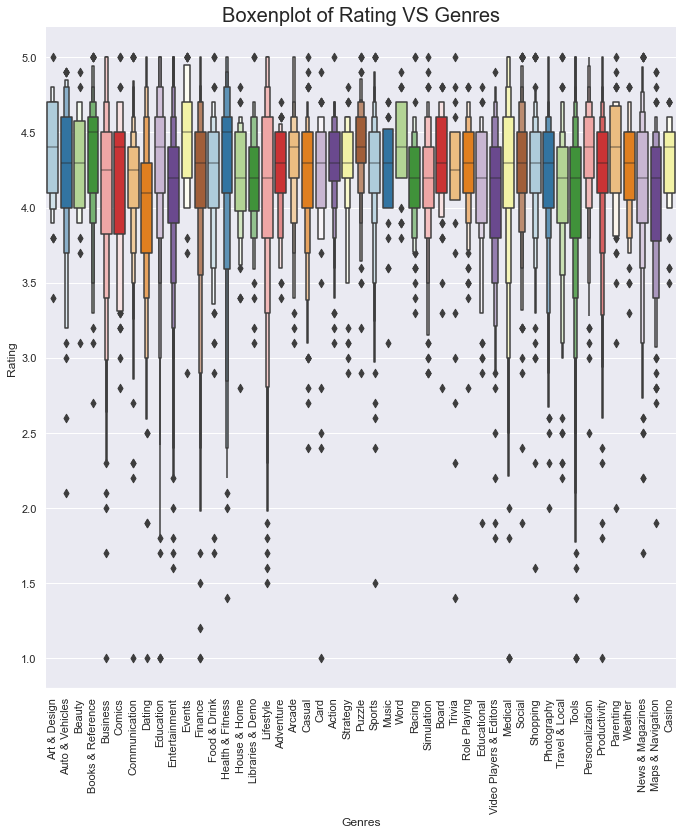

In [83]:
g = sns.catplot(x="Genres",y="Rating",data=dataset, kind="boxen", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxenplot of Rating VS Genres',size = 20)

Amb aquest últim boxplot queda més que clar que no hi ha cap relació entre els gèneres de l'aplicació i la seva valoració, ja que totes marquen una tendència similar.

I l'última variable que estudiaré serà ***Last Updated***, ja que podria ser que com més actualitzada estigui l'aplicació, més bones valoracions tingui. El problema d'aquesta variable és que, tot i que sigui un valor string, conté la informació d'un dia. Així doncs s'ha de modificar de tal manera que el programa la pugui entendre com una dada amb la que pugui treballar.

In [84]:
dataset['aux'] = pd.to_datetime(dataset['Last Updated'])
dataset['aux'].describe()

count                    8878
unique                   1299
top       2018-08-03 00:00:00
freq                      291
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: aux, dtype: object

Per poder treballar amb aquestes dades, el que faré serà agafar com a referència la data més actual, i calcularé els dies de diferència que hi ha entre aquell dia i qualsevol altra.

In [85]:
dataset['Last Updated'] = (dataset['aux'].max() - dataset['aux']).dt.days
dataset['Last Updated'].head()

0    213
1    205
2      7
3     61
4     49
Name: Last Updated, dtype: int64

I ara miro com de distribuïdes estan aquestes dades

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

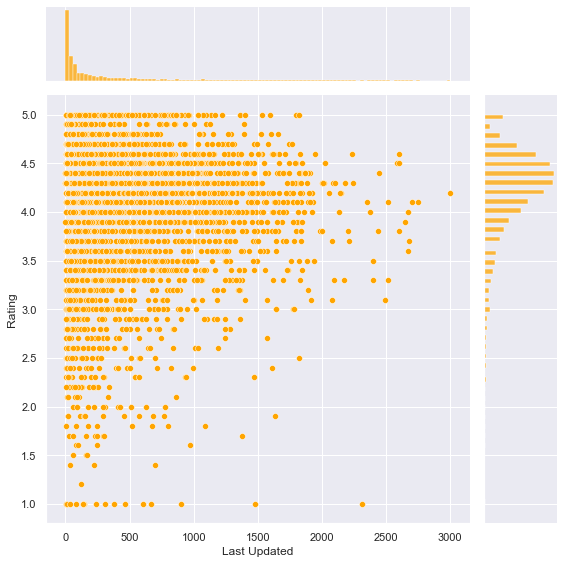

In [86]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Last Updated", y="Rating",color = 'orange', data=dataset, size = 8)

Amb aquesta distribució no em queda clar quina és la tendència de les dades, per tant faig un test de regressió

Text(0.5, 1.0, 'Rating VS Last Updated')

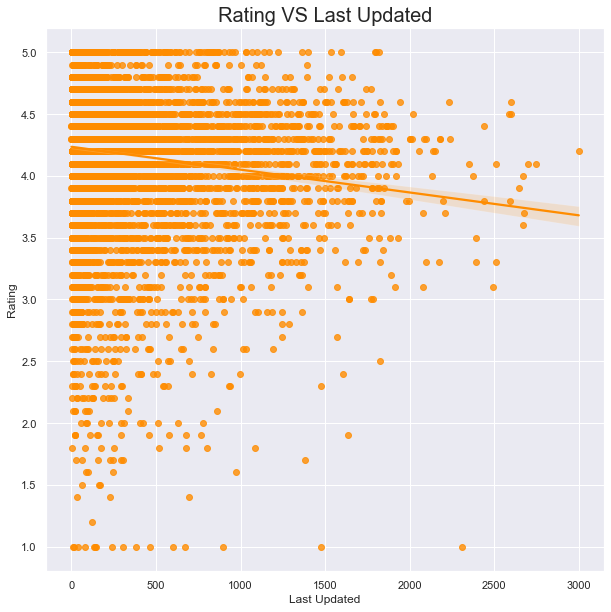

In [87]:
plt.figure(figsize = (10,10))
sns.regplot(x="Last Updated", y="Rating", color = 'darkorange',data=dataset)
plt.title('Rating VS Last Updated',size = 20)

Amb aquesta linia de tendència queda clar que com més actualitzada estigui l'aplicació, més bones valoracions tindran.

# Validació de models

Per fer els testos d'aquest estudi he fer servir regressions lineals. Tot i així vaig estudiar quin és el millor model pel meu dataset.

El primer que faré serà transformar totes les dades que no tinc com a valors numèrics, per tal de poder-les fer servir en els diferents models que vull provar.

In [88]:
lblencoder=LabelEncoder()

dataset['App']=lblencoder.fit_transform(dataset['App'])
dataset['Category']=lblencoder.fit_transform(dataset['Category'])
dataset['Genres']=lblencoder.fit_transform(dataset['Genres'])
dataset['Content Rating']=lblencoder.fit_transform(dataset['Content Rating'])
dataset['Type']=lblencoder.fit_transform(dataset['Type'])

Ara elimino el resta de variables que no vull fer servir per a validar els meus models

In [89]:
dataset.drop(['Current Ver', 'Android Ver', 'PriceBand', 'aux'],axis=1,inplace=True)

Després definiré diferents funcions que les faré servir més endavant

In [90]:
model_results = []

def runModel(model, x_tr, x_te, y_tr, y_te,model_name):
    model.fit(x_tr,y_tr)
    r2_tr=model.score(x_tr, y_tr)
    r2_te=model.score(x_te, y_te)
    print(model_name,'- Train R2',r2_tr)
    print(model_name,'- Test R2',r2_te)

    y_predict = model.predict(x_te)
    mse=metrics.mean_squared_error(y_predict, y_te)

    rmse=np.sqrt(mse)
    print('RMSE',rmse)
    model_results.append({'Model':model_name,'Train R2':r2_tr,'Test R2':r2_te,'RMSE':rmse})

I ara definiré les variables que em serviran per a poder aplicar els diferents models

In [91]:
X = dataset.drop(['Rating'],axis=1)
Y = dataset['Rating']
Y = Y.astype('int')

x_train,x_test,y_train,y_test = train_test_split( X, Y, test_size=0.25, random_state=1)

std_scale = StandardScaler()
x_train = std_scale.fit_transform(x_train)
x_test = std_scale.fit_transform(x_test)

### Model 1 - Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lgr = LogisticRegression()
y_train = lblencoder.fit_transform(y_train)
y_test = lblencoder.fit_transform(y_test)

runModel(lgr, x_train, x_test, y_train, y_test, 'LogisticRegression')

LogisticRegression - Train R2 0.7512766596575549
LogisticRegression - Test R2 0.7450450450450451
RMSE 0.6238502938920436


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model 2 - Linear Regression

In [93]:
linreg=LinearRegression()

runModel(linreg,x_train,x_test,y_train,y_test,'LinearRegression')

LinearRegression - Train R2 0.021377832474045455
LinearRegression - Test R2 0.020359845842257362
RMSE 0.5727428273417468


### Model 3 - Decision Tree Regression

In [94]:
dtr=DecisionTreeRegressor(random_state=1)
runModel(dtr,x_train,x_test,y_train,y_test,'DecisionTreeRegressor')

DecisionTreeRegressor - Train R2 1.0
DecisionTreeRegressor - Test R2 -0.23895038672131585
RMSE 0.6441000425903299


### Model 4 - Decision Tree Regression - Hyperparameters

In [95]:
dtr1=DecisionTreeRegressor(random_state=7)
criterion=('mse', 'friedman_mse', 'mae')
max_depth = [int(x) for x in np.linspace(1, 30, num = 10)]
max_depth.append(None)
max_leaf_nodes = [int(x) for x in np.linspace(2, 30, num = 10)]

min_samples_split = [2,3,4,5,6,7,8,9,10]
min_samples_leaf = [1,2,3,4]

random_grid1 = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

rf_random1 = RandomizedSearchCV(estimator=dtr1,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,random_state=7,n_jobs=-1)
rf_random1.fit(x_train,y_train)
rf_random1.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 14,
 'max_depth': 4,
 'criterion': 'mse'}

In [96]:
dtr2=DecisionTreeRegressor(min_samples_split=8,min_samples_leaf=4,max_leaf_nodes=14,max_depth=4,criterion='mse',random_state=1)
runModel(dtr2,x_train,x_test,y_train,y_test,'DecisionTreeRegressor with Hyperparamters')

DecisionTreeRegressor with Hyperparamters - Train R2 0.13227220563935904
DecisionTreeRegressor with Hyperparamters - Test R2 -0.09544022817247888
RMSE 0.6056485933548417


### Model 5 - Random Forest Regressor

In [97]:
rfr1 = RandomForestRegressor(n_estimators=100,random_state=1)
runModel(rfr1,x_train,x_test,y_train,y_test,'RandomForestRegressor')

RandomForestRegressor - Train R2 0.8802078244129619
RandomForestRegressor - Test R2 -0.04300533847507482
RMSE 0.5909757163346878


### Model 6 - Random Forest Regressor - Hyperparameters

In [98]:
rfr2=RandomForestRegressor(random_state=7)

n_estimators = [int(x) for x in np.linspace(start=50, stop=110, num=10)]
criterion=('mse', 'friedman_mse', 'mae')
max_depth = [int(x) for x in np.linspace(1, 30, num = 10)]
max_depth.append(None)
max_leaf_nodes = [int(x) for x in np.linspace(2, 30, num = 10)]

min_samples_split = [2,3,4,5,6,7,8,9,10]
min_samples_leaf = [1,2,3,4]

random_grid1 = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

rf_random1 = RandomizedSearchCV(estimator=rfr2,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,random_state=7,n_jobs=-1)
rf_random1.fit(x_train,y_train)
rf_random1.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 63,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 30,
 'max_depth': 7,
 'criterion': 'mse'}

In [99]:
rfr3 = RandomForestRegressor(n_estimators=63,max_depth=7,criterion='mse',min_samples_split=5,min_samples_leaf=4,max_leaf_nodes=30,random_state=1)
runModel(rfr3,x_train,x_test,y_train,y_test,'RandomForestRegressor with Hyperparameters')

RandomForestRegressor with Hyperparameters - Train R2 0.21715209140416658
RandomForestRegressor with Hyperparameters - Test R2 -0.01757929134280989
RMSE 0.5837279654444419


### Model 7 - Bagging Regression

In [100]:
br = BaggingRegressor(n_estimators=300,random_state=1)
runModel(br,x_train,x_test,y_train,y_test,'BaggingRegressor')

BaggingRegressor - Train R2 0.8827521903436484
BaggingRegressor - Test R2 -0.047695368797128435
RMSE 0.5923029315837993


### Model 8 - Bagging Regression - Hyperparameters

In [101]:
br1=BaggingRegressor(random_state=7)
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300, num = 50)]
max_features = [1,2,3,4,5,6,7,8,9]
max_samples = [1,2,3,4,5,6,7,8,9]
bootstrap = [True]
bootstrap_features = [True, False]
oob_score = [True, False]
warm_start = [False]
random_grid1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
               'bootstrap': bootstrap,
               'bootstrap_features': bootstrap_features,
               'oob_score': oob_score,
               'warm_start': warm_start}

rf_random1 = RandomizedSearchCV(estimator=br1,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,random_state=7,n_jobs=-1)
rf_random1.fit(x_train,y_train)
rf_random1.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'warm_start': False,
 'oob_score': False,
 'n_estimators': 251,
 'max_samples': 8,
 'max_features': 3,
 'bootstrap_features': True,
 'bootstrap': True}

In [102]:
br2 = BaggingRegressor(n_estimators=500,max_samples=1000,random_state=1)
runModel(br2,x_train,x_test,y_train,y_test,'BaggingRegressor with Hyperparameters')

BaggingRegressor with Hyperparameters - Train R2 0.36209554650121534
BaggingRegressor with Hyperparameters - Test R2 -0.011463109089102419
RMSE 0.5819710667400249


### Model 9 - AdaBoostRegression

In [103]:
abr = AdaBoostRegressor(n_estimators=300,random_state=1)
runModel(abr,x_train,x_test,y_train,y_test,'AdaBoostRegressor')

AdaBoostRegressor - Train R2 0.09794819373473207
AdaBoostRegressor - Test R2 0.0015492372651761954
RMSE 0.5782154562936013


### Model 10 - AdaBoostRegression - Hyperparameters

In [104]:
abr1=AdaBoostRegressor(random_state=7)

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300, num = 50)]
learning_rate = [1,2,3,4,5,6,7,8,9]
random_grid1 = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}

rf_random1 = RandomizedSearchCV(estimator=abr1,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,random_state=7,n_jobs=-1)
rf_random1.fit(x_train,y_train)
rf_random1.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1, 'learning_rate': 5}

In [105]:
abr2 = AdaBoostRegressor(n_estimators=1,learning_rate=5,random_state=1)
runModel(abr2,x_train,x_test,y_train,y_test,'AdaBoostRegressor with Hyperparameters')

AdaBoostRegressor with Hyperparameters - Train R2 0.11334042154960466
AdaBoostRegressor with Hyperparameters - Test R2 -0.0014873096786620632
RMSE 0.5790940401578555


### Model 11 - GradientBoostingRegression

In [106]:
gbr = GradientBoostingRegressor(n_estimators=300,random_state=1)
runModel(gbr,x_train,x_test,y_train,y_test,'GradientBoostingRegressor')

GradientBoostingRegressor - Train R2 0.36776338714907686
GradientBoostingRegressor - Test R2 -0.1207155406022633
RMSE 0.6125958737126347


### Comparativa de models

Ara que ja tinc els models executats, vaig a comparar quin d'ells és el que treballa millor amb el meu dataset

In [108]:
dtr_df=pd.DataFrame(model_results,columns=['Model','Train R2','Test R2','RMSE'])
dtr_df

,Model,Train R2,Test R2,RMSE
0,LogisticRegression,0.751277,0.745045,0.623850
1,LinearRegression,0.021378,0.020360,0.572743
2,DecisionTreeRegressor,1.000000,-0.238950,0.644100
3,DecisionTreeRegressor with Hyperparamters,0.132272,-0.095440,0.605649
4,RandomForestRegressor,0.880208,-0.043005,0.590976
5,RandomForestRegressor with Hyperparameters,0.217152,-0.017579,0.583728
6,BaggingRegressor,0.882752,-0.047695,0.592303
7,BaggingRegressor with Hyperparameters,0.362096,-0.011463,0.581971
8,AdaBoostRegressor,0.097948,0.001549,0.578215
9,AdaBoostRegressor with Hyperparameters,0.113340,-0.001487,0.579094


<AxesSubplot:title={'center':'Comparison of Regressor Models Results'}, xlabel='Model'>

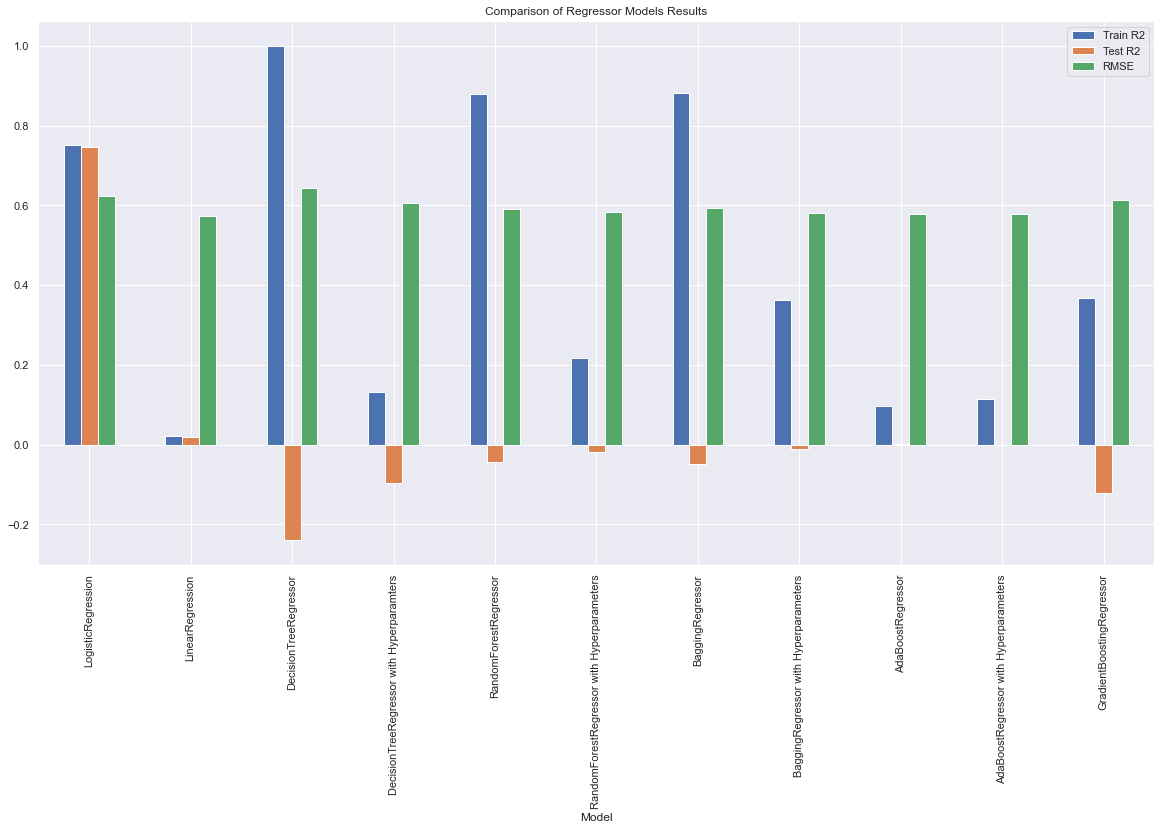

In [109]:
dtr_df.plot(kind='bar',figsize=(20,10),x='Model',title='Comparison of Regressor Models Results')

Per tant, trobo que el millor model és el Logistic Regression, ja que és l'únic que manté tots tres valors positius i i propers a 1.

# Valoració dels resultats

Després d'analitzar els meus resulats, puc donar resposta a totes les preguntes que m'he plantejat.

En primer lloc he arribat a la conclusió que el nombre de comentaris que té l'aplicació i el nombre de descàrregues estan relacionades. Tenen una correlació positiva de 0.63, la qual cosa indica que com és descàrregues, més valoracions. I viceversa. És per això que ens podria interessar posar anuncis a aquestes aplicacions, perquè són més descarregades i arriben a més gent.

D'altra banda també he estudiat les aplicacions que tenen més bones valoracions. D'aquest estudi m'he endut moltes sorpreses. Les variables que poden influenciar positivament en les valoracions de les aplicacions són el nombre de comentaris que tingui, el tamany de l'aplicació, el nombre d'instal·lacions i quina és l'última vegada que van ser actualitzades. Així doncs, si el meu criteri per posar anuncis és la seva valoració, miraria de posar-ne en aplicacions que compleixin totes aquestes característiques. 

Tot i que el preu no estigui relacionat amb les valoracions, sí que he arribat a la conclusió que posaria anuncis a aquelles aplicacions que fossin gratuïtes, ja que poden arribar a més gent.

# Bibliografia

[Dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv) d'on he descarregat les dades

[Codi](https://www.kaggle.com/code/sachinjakasaniya/eda-playstore) d'un usuari que he fet servir de referència. Anàlisi de les dades, neteja del dataset, estudis superficials de les dades

[Codi](https://www.kaggle.com/code/tanetboss/how-to-get-high-rating-on-play-store) d'un usuari que he fet servir de referència. Com obtenir una bona nota amb GoogleStore?